In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread('New_Zealand_Boat.jpg', cv2.IMREAD_COLOR_BGR)

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

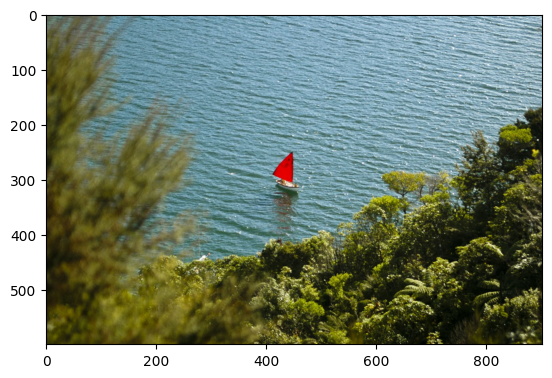

In [12]:
plt.imshow(img)

In [13]:
img.shape

(600, 903, 3)

In [14]:
h = 256
w = 256
dims = (w, h)

resized = cv2.resize(img, dsize=dims)

In [16]:
resized.shape

(256, 256, 3)

### Normalizing pixel values btw 0 & 1

In [34]:
resized.dtype

dtype('uint8')

In [31]:
norm_img = cv2.normalize(resized, None, 0, 1, cv2.NORM_MINMAX,dtype=cv2.CV_32F)

In [35]:
norm_img.dtype

dtype('float32')

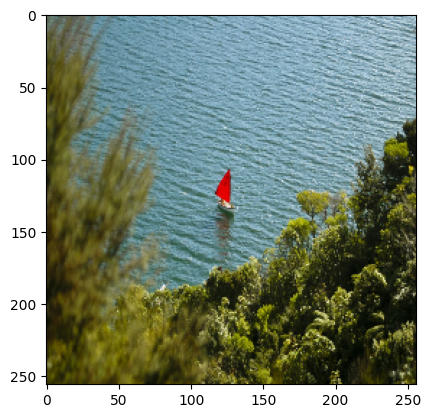

In [36]:
plt.imshow(norm_img)

### Appplying Gaussian Blur

In [37]:
gauss = cv2.GaussianBlur(norm_img, (5,5), 0)

### Edge Detecting

In [41]:
edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.GaussianBlur(edges, (5,5), 0 )

In [42]:
edges = cv2.Canny(edges, 50, 150)

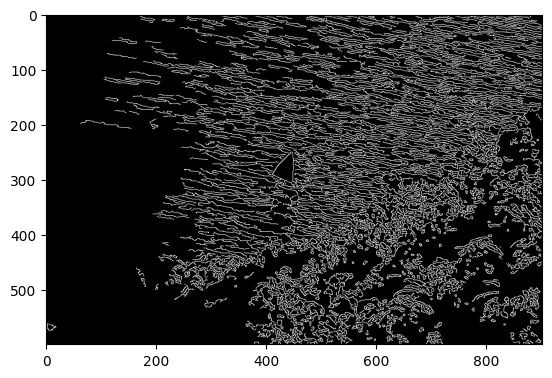

In [44]:
plt.imshow(edges, cmap='gray')

### Augmentations

In [59]:
#flipping
flip = cv2.flip(img, 1)

#rotating
img = cv2.imread('New_Zealand_Boat.jpg', cv2.IMREAD_GRAYSCALE)
h,w = img.shape[:2]

M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)
rotated = cv2.warpAffine(img, M, (w,h))

In [61]:
#adding gaussian noise
noise = np.random.normal(0,25, img.shape)
gaussian = img + noise
gaussian = np.clip(gaussian, 0, 255).astype(np.uint8)

In [66]:
#brightness and contrast adjustment
adj_img = cv2.convertScaleAbs(img, alpha=1.5, beta=30)

### Adding text on Overlay

In [70]:
overlay = img.copy()

text = 'Week 31 Task'
position = (50,100)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.2
color = (255,255,255)
thickness = 2

cv2.putText(overlay, text, position, font, font_scale, color, thickness, cv2.LINE_AA)

#blend overlay

alpha = 0.4
output = cv2.addWeighted(overlay, alpha, rotated, 1-alpha, 0)

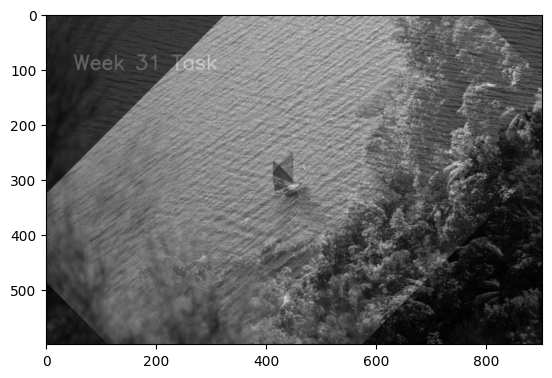

In [71]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))